In [1]:
!wget https://raw.githubusercontent.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt

--2023-12-24 15:24:34--  https://raw.githubusercontent.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3775 (3.7K) [text/plain]
Saving to: ‘marks.txt’

marks.txt           100%[===================>]   3.69K  --.-KB/s    in 0s      

2023-12-24 15:24:34 (49.4 MB/s) - ‘marks.txt’ saved [3775/3775]



In [2]:
ls

marks.txt  sample_data/


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
df = pd.read_csv('marks.txt')

In [5]:
df

,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0
...,...,...,...
94,83.489163,48.380286,1
95,42.261701,87.103851,1
96,99.315009,68.775409,1
97,55.340018,64.931938,1


In [14]:
X = df.iloc[:, :-1]
X

,34.62365962451697,78.0246928153624
0,30.286711,43.894998
1,35.847409,72.902198
2,60.182599,86.308552
3,79.032736,75.344376
4,45.083277,56.316372
...,...,...
94,83.489163,48.380286
95,42.261701,87.103851
96,99.315009,68.775409
97,55.340018,64.931938


In [7]:
X.shape

(99, 2)

In [8]:
Y = df.iloc[:, -1]


In [9]:
Y.shape

(99,)

Hiển thị dữ liệu

In [ ]:
reds = df.loc[Y == 0] # Reds: 0

In [ ]:
blues = df.loc[Y == 1] # Blues: 1

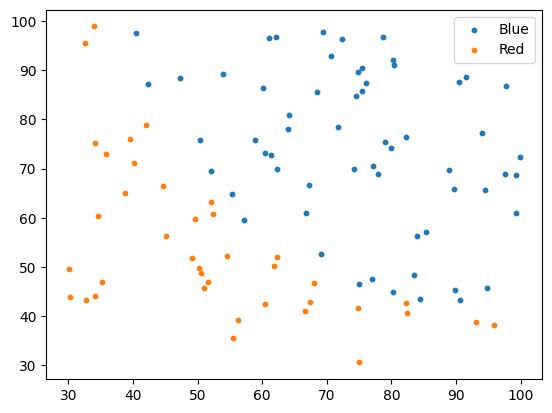

In [ ]:
plt.scatter(blues.iloc[:, 0], blues.iloc[:, 1], s=10, label='Blue')
plt.scatter(reds.iloc[:, 0], reds.iloc[:, 1], s=10, label='Red')
plt.legend()
plt.show()

Tách thành bộ Train và Test

In [15]:
X = df.iloc[:, :-1]

In [16]:
X.shape

(99, 2)

In [17]:
X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
X.shape

(99, 3)

In [18]:
Y = df.iloc[:, -1]

In [19]:
Y = np.reshape(Y.to_numpy(), (Y.shape[0], 1))
Y.shape

(99, 1)

In [26]:
trainX, testX = X[:80], X[80:] # dev/validation
trainY, testY = Y[:80], Y[80:]
trainX.shape,testX.shape

((80, 3), (19, 3))

In [25]:
testX.shape

(19, 3)

1. Định nghĩa hàm

In [ ]:
# Hàm tuyến tính
def cal_z(theta, x):
  # x shape (95, 3)
  # theta shape: (3, 1)
  # z shape (95, 1)
  return x.dot(theta)

In [ ]:
# Hàm sigmoid
def sigmoid(z):
  # Output shape: (95, 1)
  return 1 / (1 + np.exp(-z))

In [ ]:
def hypo(theta, x):
  # Output shape: (95, 1)
  return sigmoid(cal_z(theta, x))

In [ ]:
def crossEntropy(theta, x, y):
  h_theta = hypo(theta, x)
  loss = - ((y * np.log(h_theta) + (1 - y) * (np.log(1 - h_theta)))) # (95, 1)
  return np.mean(loss)

In [ ]:
def gradient(theta, x, y):
  # x shape (95, 3)
  # theta shape: (3, 1)
  # y shape (95, 1)
  # grad shape: (3, 95) x (95, 1) = (3, 1)

  h_theta = hypo(theta, x)
#   print(h_theta.shape)
#   print(x.shape)
  grad = x.T.dot(h_theta-y)
  return grad
  # Logistic Regression Model

In [ ]:
theta = np.random.normal(size=3).reshape((3, 1))

In [ ]:
gradient(theta, trainX, trainY).shape

(3, 1)

In [ ]:
# Đưa về phân phối chu đơn vị
def normalize_data(train_x, test_x):
    train_mean = np.mean(train_x, axis=(0,1), dtype=np.float64, keepdims=True)
    train_std = np.std(train_x, axis=(0,1), dtype=np.float64, keepdims=True)
    train_x = (train_x-train_mean)/train_std
    test_x = (test_x-train_mean)/train_std
    return train_x, test_x

In [ ]:
trainX, testX = normalize_data(trainX, testX)

In [ ]:
trainX[0], trainY[0]
testX[0], testY[0]

(array([ 1.52640616,  0.0683866 , -1.25772062]), array([1]))

In [ ]:
epochs = 200
learning_rate = 0.01
theta = np.random.normal(size=3).reshape((3, 1))
for i in range(epochs):
  grad = gradient(theta, trainX, trainY)
  theta = theta - learning_rate * grad
  loss = crossEntropy(theta, trainX, trainY)

  if i % 100 == 0:
    print('Loss is: {}'.format(loss))

Loss is: 1.1996362986045146
Loss is: 0.26849868674676636


In [ ]:
testX

array([[ 1.52640616,  0.0683866 , -1.25772062],
       [ 0.71001201,  0.6883553 , -1.25772062],
       [ 0.41091594,  0.47843365, -1.25772062],
       [ 1.09713921,  1.41145158, -1.25772062],
       [ 0.74411138,  1.25224382, -1.25772062],
       [-0.03898695,  1.05198144, -1.25772062],
       [ 0.95207801,  1.39555974, -1.25772062],
       [ 1.04576955,  1.58019661, -1.25772062],
       [ 0.26580583,  0.51567688, -1.25772062],
       [ 1.5044447 ,  1.00196626, -1.25772062],
       [ 1.39627219,  1.30904775, -1.25772062],
       [ 0.35879817, -0.23198686, -1.25772062],
       [ 0.92285218,  1.23001549, -1.25772062],
       [ 1.3783884 ,  0.05841658, -1.25772062],
       [ 1.18978291,  0.14808122, -1.25772062],
       [-0.03346091,  1.29703291, -1.25772062],
       [ 1.65934537,  0.75321692, -1.25772062],
       [ 0.35458069,  0.63917879, -1.25772062],
       [ 0.93125491,  1.36901267, -1.25772062]])

In [ ]:
hypo(theta, testX)

array([[0.87100998],
       [0.75438184],
       [0.29652882],
       [0.99570375],
       [0.96909843],
       [0.40192985],
       [0.99196742],
       [0.997268  ],
       [0.21632084],
       [0.99572074],
       [0.99801248],
       [0.02131219],
       [0.98302454],
       [0.78445529],
       [0.71132001],
       [0.64012404],
       [0.9938793 ],
       [0.38696008],
       [0.99035455]])

Tensorflow 2 - Model

In [ ]:
trainX = trainX[:, :-1]

In [ ]:
trainX.shape

(80, 2)

In [ ]:
testX = testX[:, :-1]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(2,)))
from tensorflow.keras.optimizers import SGD
model.compile(SGD(0.001), loss='binary_crossentropy', metrics=['acc'])
model.fit(trainX, trainY, epochs=200, validation_data=(testX, testY))

Epoch 1/200
3/3 [==============================] - 1s 86ms/step - loss: 0.5591 - precision: 0.5867 - val_loss: 0.3431 - val_precision: 0.8421
Epoch 2/200
3/3 [==============================] - 0s 27ms/step - loss: 0.5591 - precision: 0.5867 - val_loss: 0.3431 - val_precision: 0.8421
Epoch 3/200
3/3 [==============================] - 0s 19ms/step - loss: 0.5590 - precision: 0.5867 - val_loss: 0.3432 - val_precision: 0.8421
Epoch 4/200
3/3 [==============================] - 0s 26ms/step - loss: 0.5589 - precision: 0.5867 - val_loss: 0.3432 - val_precision: 0.8421
Epoch 5/200
3/3 [==============================] - 0s 29ms/step - loss: 0.5588 - precision: 0.5867 - val_loss: 0.3432 - val_precision: 0.8421
Epoch 6/200
3/3 [==============================] - 0s 26ms/step - loss: 0.5588 - precision: 0.5867 - val_loss: 0.3433 - val_precision: 0.8421
Epoch 7/200
3/3 [==============================] - 0s 26ms/step - loss: 0.5587 - precision: 0.5867 - val_loss: 0.3433 - val_precision: 0.8421
Epoch 

In [ ]:
testX.shape

(19, 2)

SoftMax Function + Categorical Cross Entropy

In [ ]:
z = np.array([5, 2, 4, 3])

In [ ]:
def softmax(z):
  return np.exp(z) / np.sum(np.exp(z), axis=0)

In [ ]:
softmax(z)

array([0.64391426, 0.0320586 , 0.23688282, 0.08714432])

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
loss = CategoricalCrossentropy(reduction='none')
a = np.array([[0.6, 0.3, 0.05, 0.05], [0.3, 0.1, 0.5, 0.1]])
y_true = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
loss(y_true, a)

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([0.51082562, 2.30258509])>

In [ ]:
-1/2 *(np.log(0.6) + np.log(0.1))

1.4067053583800182

In [ ]:
z = np.array([5, 2, 4, 3])

In [ ]:
def softmax(z):
  return np.exp(z) / np.sum(np.exp(z), axis=0)

In [ ]:
softmax(z)

array([0.64391426, 0.0320586 , 0.23688282, 0.08714432])